## Impotrt lib

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Outils ia Entrainement
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#outils graphique
import matplotlib.pyplot as plt
import seaborn as sns


#import les fichier py
%matplotlib inline
%load_ext autoreload
%autoreload 2

#from outils import *

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
df = pd.read_csv('cars.csv')
df.head()

,Car,MPG,Weight,Cylinders,Horsepower,Country
0,Buick Skylark,28.4,2.67,4,90,U.S.
1,Dodge Omni,30.9,2.23,4,75,U.S.
2,Mercury Zephyr,20.8,3.07,6,85,U.S.
3,Fiat Strada,37.3,2.13,4,69,Italy
4,Peugeot 694 SL,16.2,3.41,6,133,France


In [26]:
df.dtypes

Car            object
MPG           float64
Weight        float64
Cylinders       int64
Horsepower      int64
Country        object
dtype: object

In [27]:
df["Country"].unique()

array(['U.S.', 'Italy', 'France', 'Germany', 'Japan', 'Sweden'],
      dtype=object)

In [28]:
df["Car"].nunique()

38

## changer le type des donne d objet en categorie


In [29]:
df["Country"] = df["Country"].astype("category")
df["Car"] = df["Car"].astype("category")
df.dtypes

Car           category
MPG            float64
Weight         float64
Cylinders        int64
Horsepower       int64
Country       category
dtype: object

##  Définir un ordre pour la variable Nominal 


In [30]:
df['Country'] = df['Country'].cat.codes
df['Car'] = df['Car'].cat.codes
df.head()

,Car,MPG,Weight,Cylinders,Horsepower,Country
0,6,28.4,2.67,4,90,5
1,17,30.9,2.23,4,75,5
2,27,20.8,3.07,6,85,5
3,19,37.3,2.13,4,69,2
4,29,16.2,3.41,6,133,0


## Separe le df en deux dataframe et target

In [31]:
X = df.drop(["Horsepower"], axis=1)
y = df["Horsepower"]

## Preparer er la Donnée pour l'entrainement du modele 

c'est pour ca on separe notre dataFrame de base en deux partie :

X : les caracteristiques 

y : le prix que nous voulons predire 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# on utilise train_test_split pour separer notre dataFrame en deux partie 
# on utilise test_size=0.33 pour avoir 70% de notre dataFrame pour l'entrainement et 30% pour la validation
# random_state=42 pour avoir toujours la meme separation des données

## Rassemeble les X_train avec y_train

In [33]:


df_train = X_train.copy()
df_train['Horsepower'] = y_train
df_train.head()

,Car,MPG,Weight,Cylinders,Country,Horsepower
16,36,31.5,1.990,4,1,71
12,34,30.5,2.190,4,1,78
19,11,18.5,3.940,8,5,150
9,2,20.3,2.830,5,1,103
32,20,15.5,4.054,8,5,142


In [34]:
df_train.dtypes

Car              int8
MPG           float64
Weight        float64
Cylinders       int64
Country          int8
Horsepower      int64
dtype: object

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Créer un classificateur d'arbre de décision
model = DecisionTreeClassifier(max_depth=4,random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=42)

In [36]:
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_train))


## Étape 5 : Faire des prédictions

Une fois le modèle entraîné, nous pouvons l'utiliser pour prédire les espèces de fleurs d'iris dans notre ensemble de test.

In [37]:
# Faire des prédictions
predictions = model.predict(X_test)
print(predictions)

[ 85  85 115  85  85  71  65  85  65  85  90  85]


## Étape 6 : Évaluer la performance du modèle

Pour mesurer l'exactitude de notre modèle, nous pouvons utiliser diverses métriques comme le score de précision et la matrice de confusion.

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculer l'exactitude
accuracy = accuracy_score(y_test, predictions)
print(f"Exactitude : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
print("Matrice de confusion:\n", conf_matrix)

Exactitude : 8.33%
Matrice de confusion:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


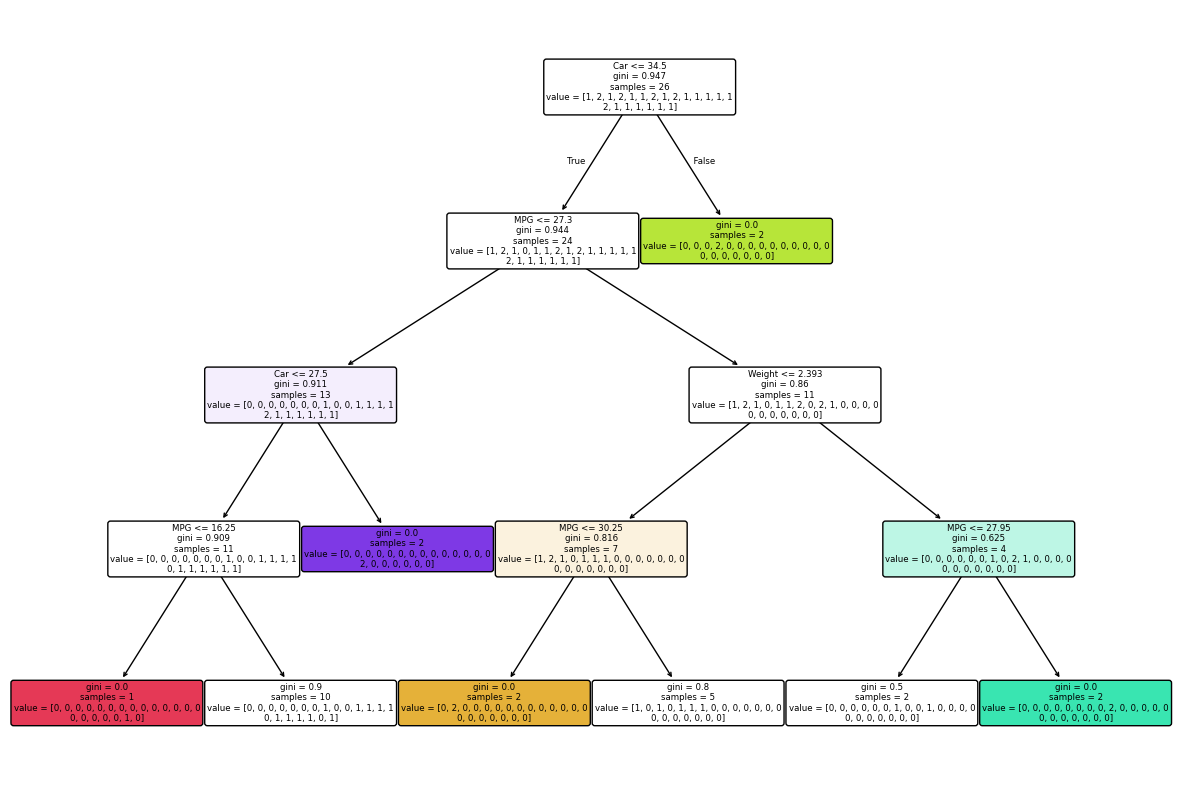

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)

plt.show()